In [1]:
import pandas as pd 

In [2]:
import numpy as np

In [3]:
from sklearn.neighbors import NearestNeighbors

In [4]:
from IPython.display import Image, display

# Paths

In [5]:
img_dir = "../../dataset/images/"

In [6]:
data = pd.read_pickle("../output_layer/inception_output")

In [7]:
data.head(10)

img                                       output layer  \
0  029599.jpg  [8.56041e-06, 7.97617e-06, 1.79152e-05, 3.7247...   
1  013369.jpg  [2.58352e-05, 1.43098e-05, 3.03804e-05, 1.8103...   
2  023620.jpg  [2.48684e-05, 2.80843e-05, 1.79409e-05, 1.1612...   
3  004139.jpg  [0.00025399, 0.000173421, 0.000117245, 0.00025...   
4  036728.jpg  [0.000127009, 5.8184e-05, 0.000140877, 0.00025...   
5  013908.jpg  [0.000166979, 4.26623e-05, 6.52378e-05, 9.8025...   
6  037133.jpg  [4.5776e-06, 1.07746e-05, 1.50345e-06, 1.92053...   
7  009180.jpg  [0.000189393, 0.000101325, 0.000330041, 0.0002...   
8  017004.jpg  [0.000665771, 0.00118076, 0.000903377, 0.00055...   
9  023071.jpg  [0.000145234, 0.000714853, 0.00013897, 0.00020...   

                                              scores  
0  {'alp': 0.967034, 'valley, vale': 0.0136182, '...  
1  {'breakwater, groin, groyne, mole, bulwark, se...  
2  {'barn': 0.948197, 'boathouse': 0.010576, 'wor...  
3  {'pot, flowerpot': 0.346745, 'patio, terrace':...  
4  {'jean, blue jean, denim': 0.312845, 'cellular...  
5  {'hair slide': 0.169585, 'cup': 0.0670312, 'mo...  
6  {'face powder': 0.694579, 'sunscreen, sunblock...  
7  {'coil, spiral, volute, whorl, helix': 0.28725...  
8  {'spotlight, spot': 0.062017, 'bubble': 0.0351...  
9  {'Angora, Angora rabbit': 0.377576, 'Arctic fo...

In [8]:
data = data.sort_values("img")

In [9]:
imgs = data["img"].values 
data = np.array(data["output layer"].values)

In [10]:
data = [np.array(row) for row in data]

In [11]:
nbrs = NearestNeighbors(n_neighbors=50, algorithm='auto').fit(data)

In [12]:
distances, indices = nbrs.kneighbors(data)

In [13]:
distances[0]

array([ 0.        ,  0.11006474,  0.12716583,  0.13386484,  0.13515491,
        0.13703473,  0.13765413,  0.14369862,  0.14507013,  0.14625087,
        0.14718425,  0.148968  ,  0.15422376,  0.15442022,  0.15513111,
        0.15526376,  0.15555437,  0.1573795 ,  0.16206502,  0.16491485,
        0.16760454,  0.16820368,  0.16861915,  0.17037208,  0.17070834,
        0.1712179 ,  0.17162511,  0.17168384,  0.17192704,  0.17528761,
        0.17531325,  0.17542213,  0.17614751,  0.17637885,  0.17650937,
        0.17771912,  0.17784935,  0.17790807,  0.1781097 ,  0.17997372,
        0.1802347 ,  0.18076281,  0.18126344,  0.18159339,  0.18178443,
        0.18208673,  0.18242298,  0.18243119,  0.18255687,  0.18322331])

In [14]:
indices

array([[    0, 26670, 37437, ..., 32787, 32266,  6842],
       [    1,  4832, 10611, ..., 15857, 10183, 16393],
       [    2, 20664,  2242, ..., 36376, 32399, 32501],
       ..., 
       [37542, 16835, 30402, ..., 10731, 10973, 25767],
       [37543,  1288, 32085, ..., 25371, 36614, 31916],
       [37544, 12480, 22003, ..., 25596, 19751,  3824]])

# Save distances 

In [15]:
np.savetxt("distances.csv", distances, delimiter=",")
np.savetxt("indices.csv", indices, delimiter=",")

In [16]:
imgs

array(['000000.jpg', '000001.jpg', '000002.jpg', ..., '037542.jpg',
       '037543.jpg', '037544.jpg'], dtype=object)

In [25]:
img_map = {}
for i in range(0,len(imgs)):
    img_map[i] = imgs[i]

In [26]:
def get_key(dic, dic_val):
    """ Returns key for value in dictionary
    """
    for k, v in dic.items():    # for name, age in list.items():  (for Python 3.x)
        if v == dic_val:
            return k

In [29]:
def get_similar_imgs(img_name,img_map, indices, k, img_dir=None):
    """ Returns list of k similar images, with or without path 
    """
    index = get_key(img_map, img_name)
#     print(index)
#     print(img_name)
    if img_dir == None:
        images = [img_map[x] for x in indices[index]]
    else: 
        images = [img_dir+img_map[x] for x in indices[index]]
    return images[:k]

In [30]:
get_similar_imgs("000009.jpg", img_map, indices, 5)

['000009.jpg', '002974.jpg', '023082.jpg', '019428.jpg', '035039.jpg']

In [31]:
def display_similar_for_img(img_dir, img_name,img_map, indices, disp_num):
    """ Displays top n similar images for specified img
    """
    images = get_similar_imgs(img_name, img_map, indices, disp_num, img_dir)
    for img in images:
        display(Image(img))

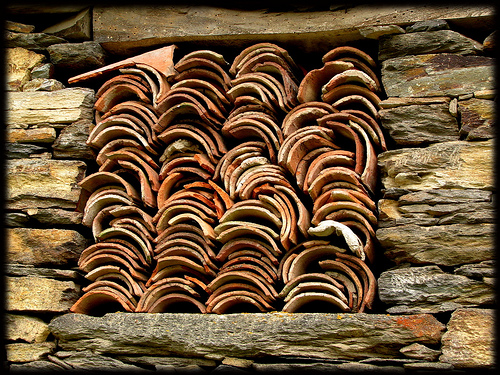

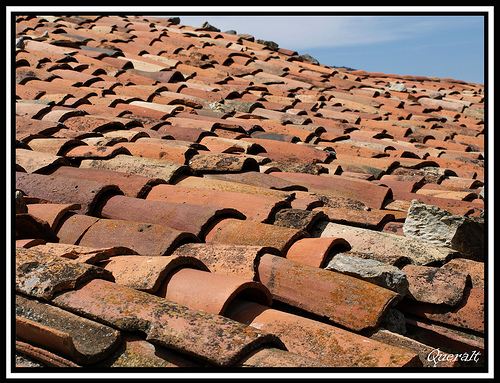

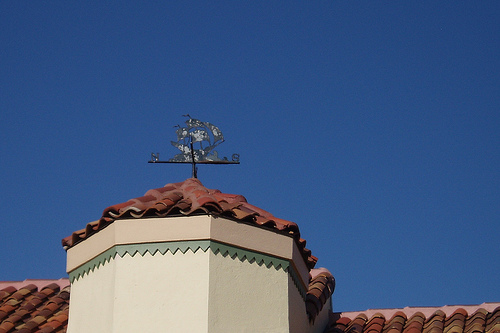

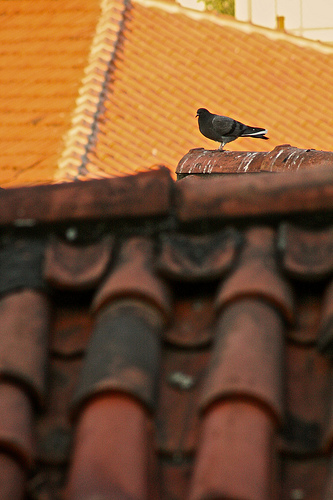

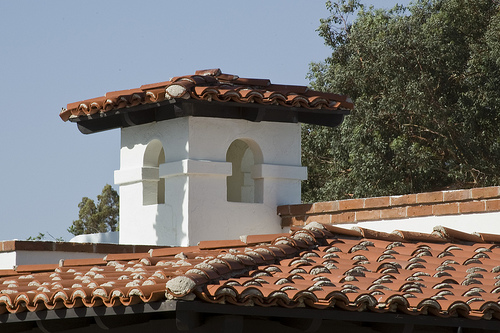

In [32]:
display_similar_for_img(img_dir, "000009.jpg", img_map, indices,5)

# Get similar images to chosen relevant images

In [33]:
def get_relevant_images(img_lst, img_map, indices, k, operation="intersection"):
    """ Returns an intersection of similar images to a given list of images
    """
    set_lst = []
    for img in img_lst:
        set_lst.append(set(get_similar_imgs(img, img_map, indices, k)))
    if operation == "union":
        return list(set.union(*set_lst))
    if operation == "intersection":
        return list(set.intersection(*set_lst))

In [34]:
def display_img(img_dir, img):
    """ Displays an image
    """
    display(Image(img_dir+img))

In [35]:
def display_imgs(img_dir,img_list):
    """ Displays images from the list
    """
    for img in img_list:
        display_img(img_dir, img)

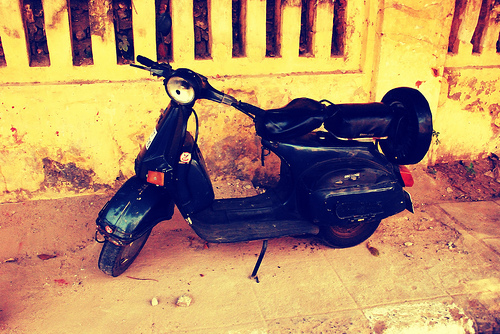

In [36]:
display_img(img_dir, "000313.jpg")

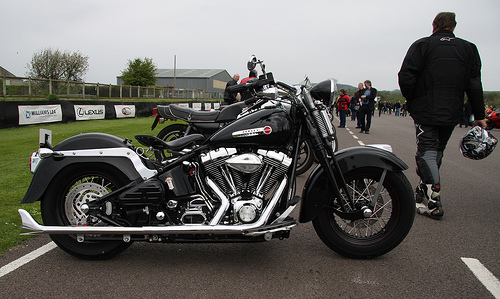

In [37]:
display_img(img_dir, "000614.jpg")

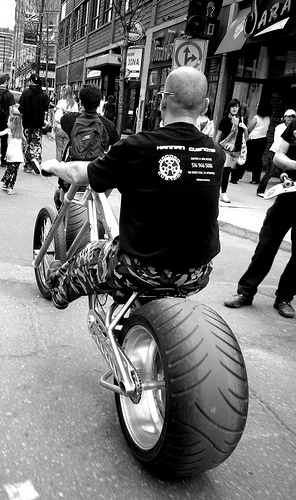

In [38]:
display_img(img_dir, "001093.jpg")

In [39]:
motorcycles = ["000313.jpg", "000614.jpg"]

In [40]:
# motorcycles = ["000614.jpg", "001093.jpg"]

In [41]:
display_imgs(img_dir, get_relevant_images(motorcycles,img_map,indices,50))

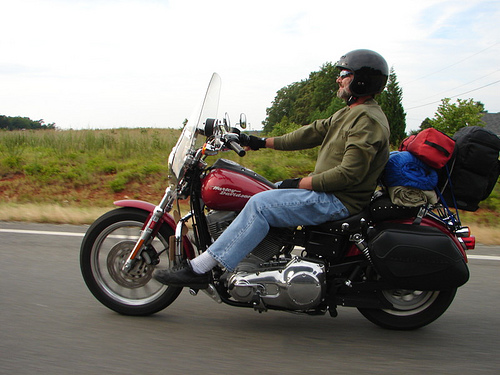

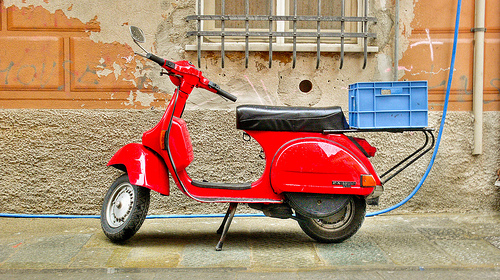

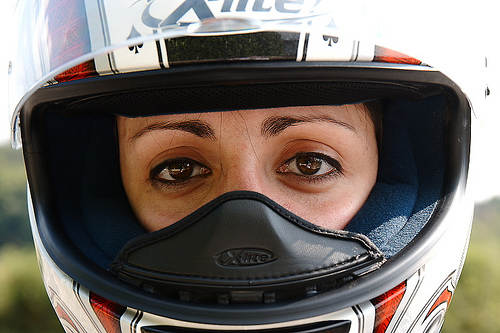

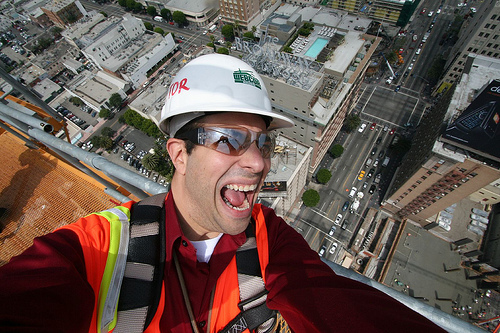

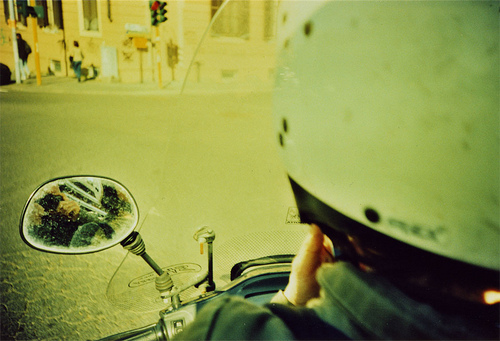

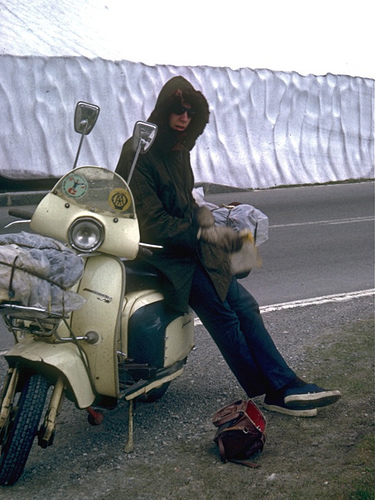

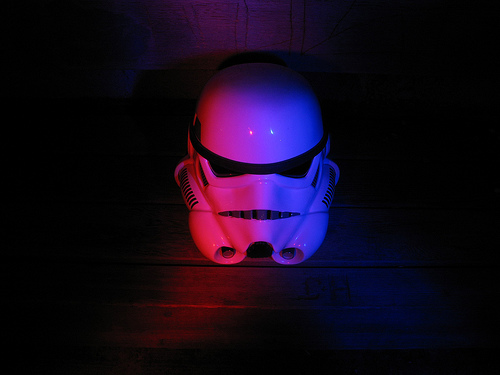

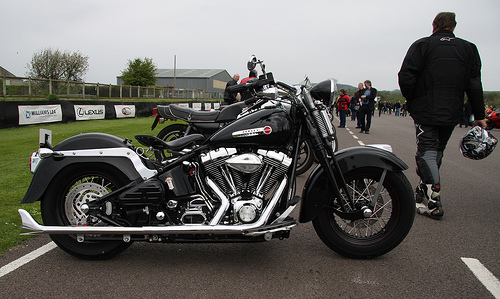

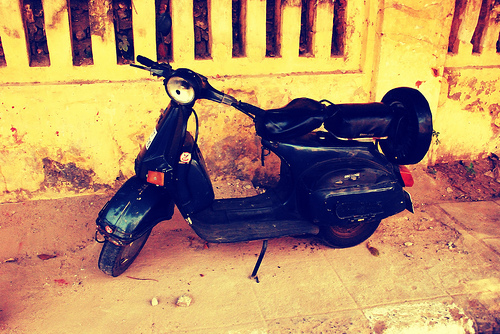

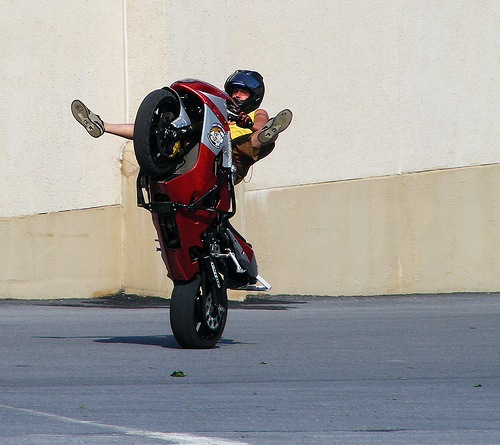

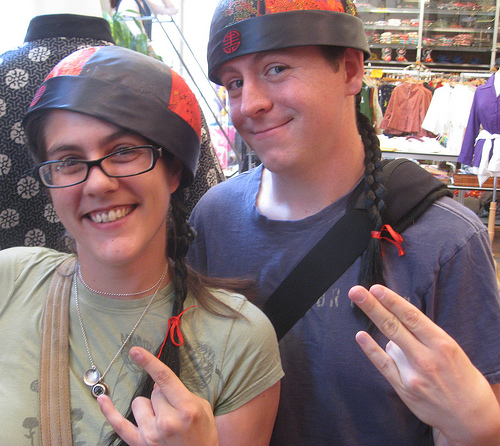

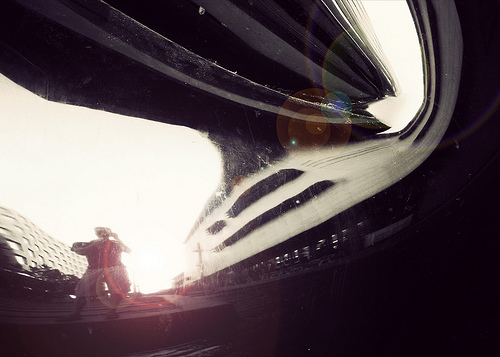

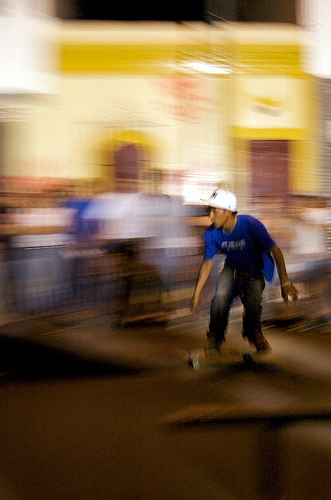

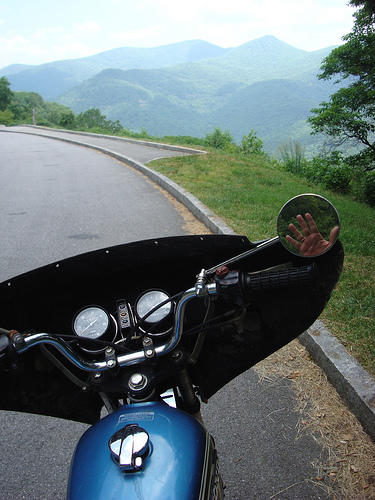

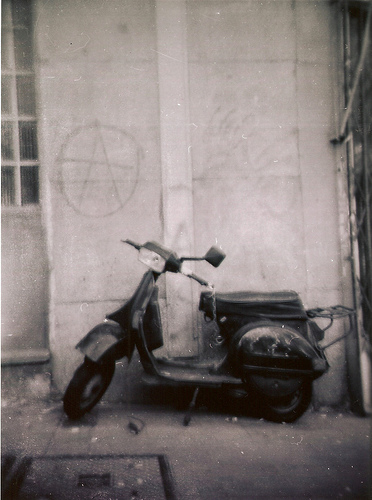

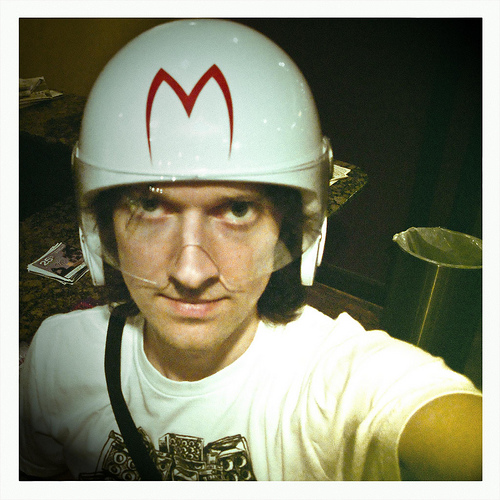

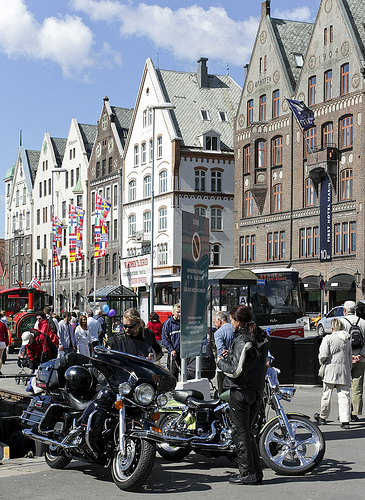

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [42]:
display_imgs(img_dir, get_relevant_images(motorcycles,img_map,indices,10, "union"))

In [49]:
display_imgs(img_dir, get_relevant_images(motorcycles,img_map,indices,50, "intersection"))

In [43]:
squirells = ["001343.jpg","002433.jpg"]

In [44]:
test = get_relevant_images(squirells,img_map,indices,10)

In [45]:
display_imgs(img_dir, test)

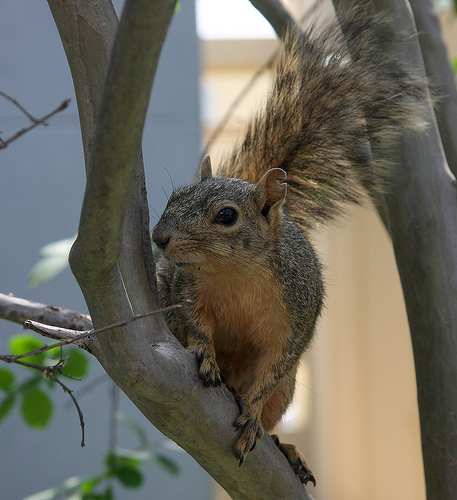

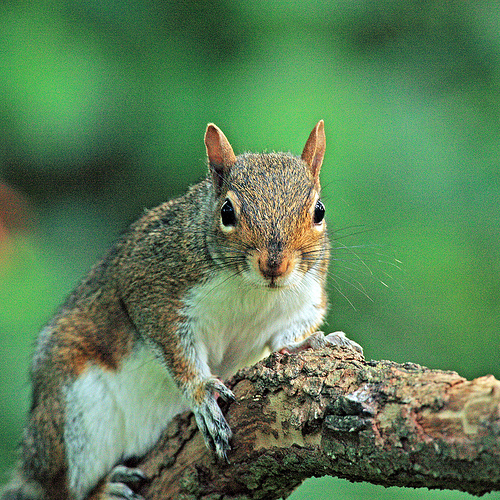

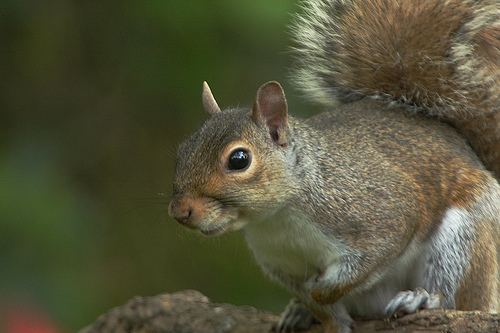

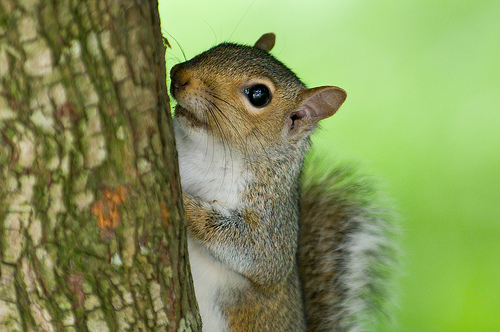

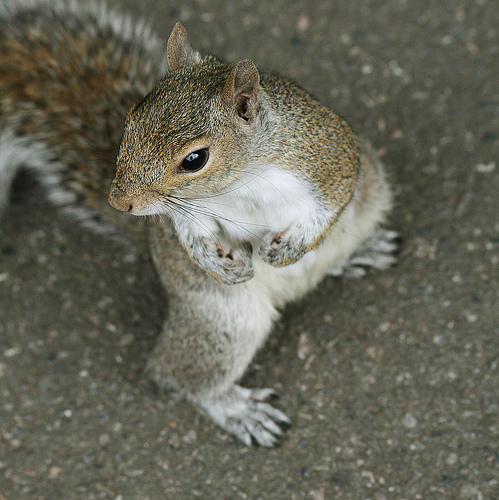

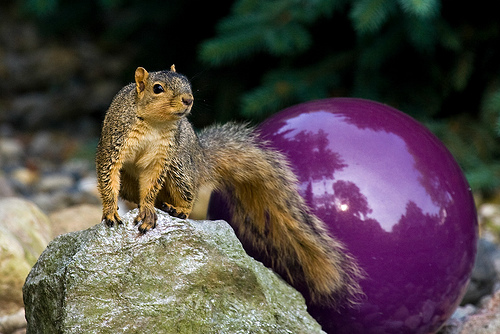

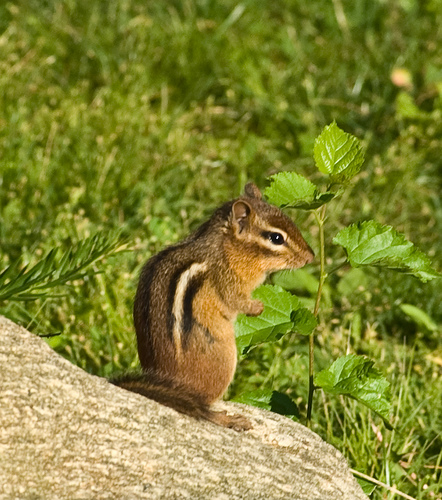

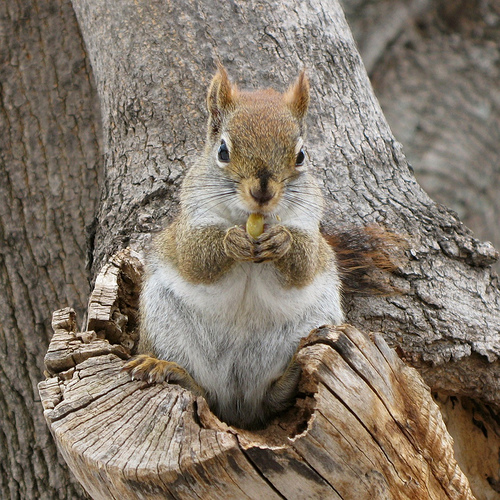

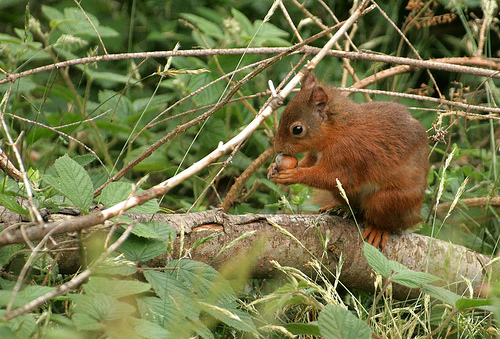

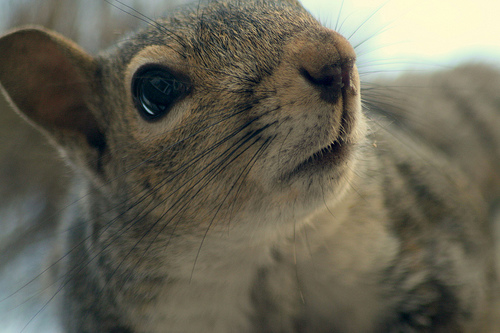

In [46]:
display_similar_for_img(img_dir,"002433.jpg",img_map, indices, 10)

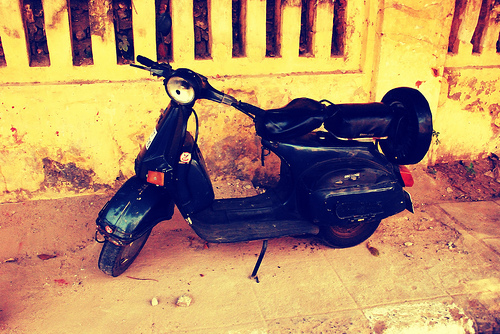

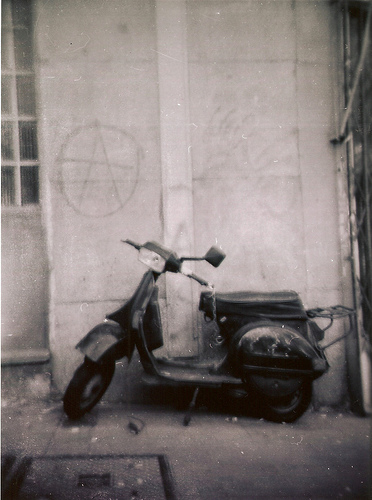

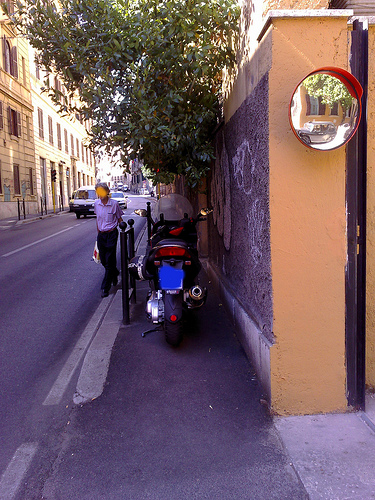

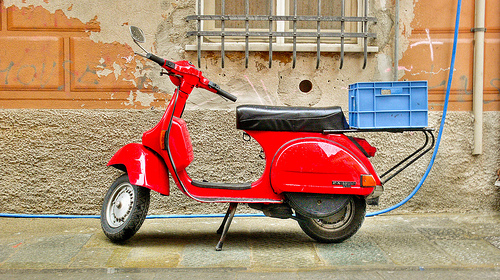

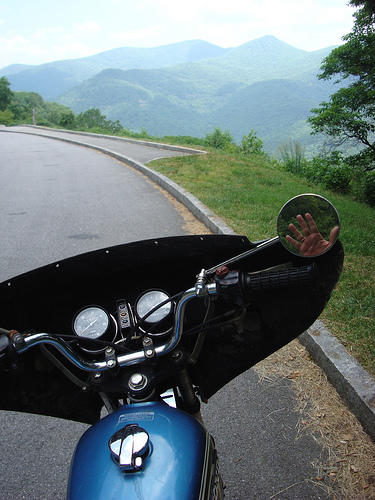

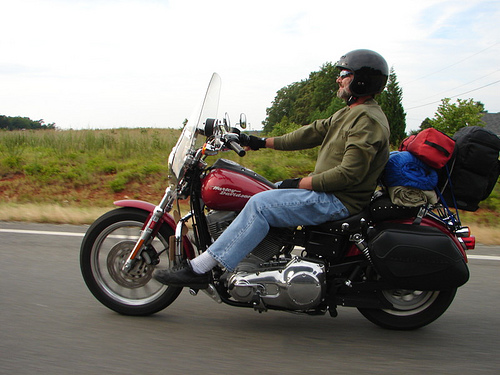

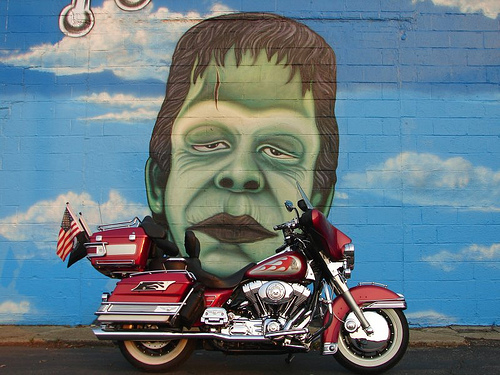

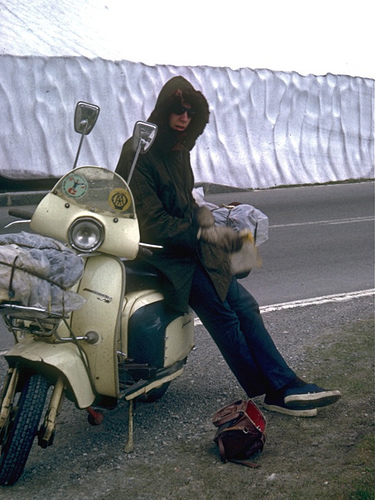

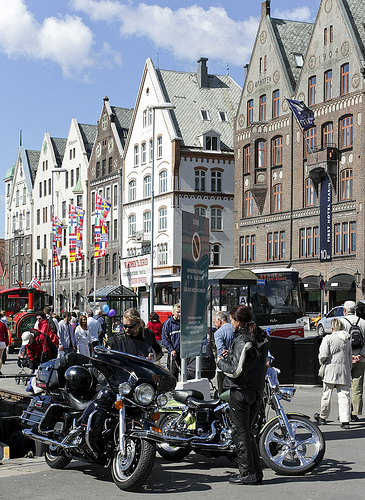

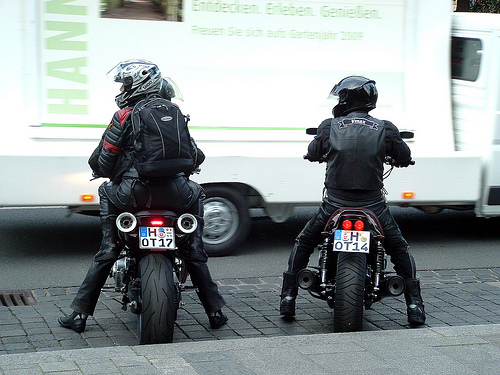

In [47]:
display_similar_for_img(img_dir,"000313.jpg",img_map, indices, 10)